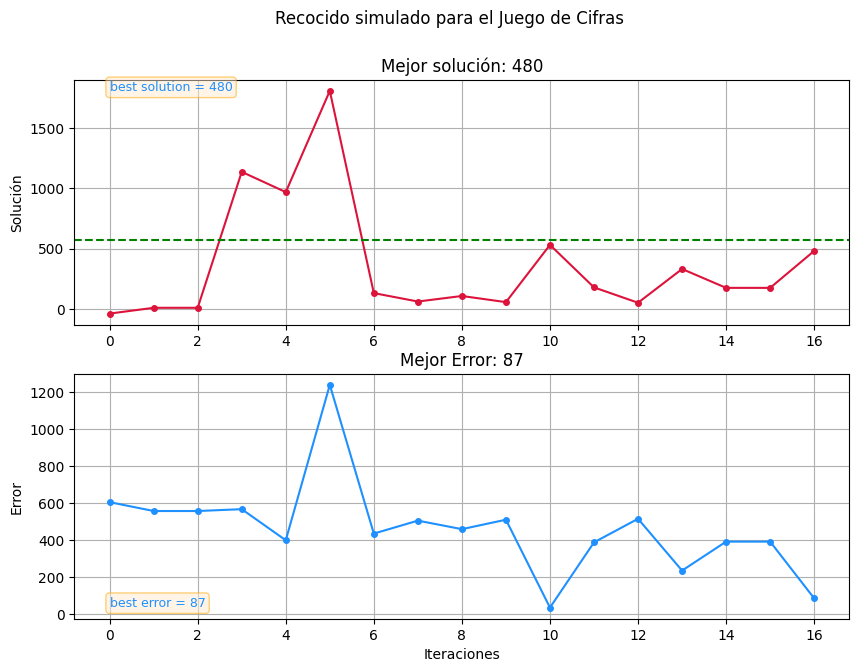

In [ ]:
import random
import math
import time
import matplotlib.pyplot as plt

# Lista de números disponibles y operaciones permitidas
NUMBERS = [2, 3, 5, 7, 10, 12, 15, 20, 23, 25, 30, 35, 40, 50, 60]
OPERATIONS = ["+", "-", "*", "/"]
TARGET = 567
MAX_ITERATIONS = 10
TEMP = 2200
COOLING_RATE= 0.92
PRINT=False

def plot_fitness(solutions, errors):
    # plt.figure(figsize=(10, 6))
    fig, axs = plt.subplots(2,figsize=(10, 7))
    fig.suptitle("Recocido simulado para el Juego de Cifras")
    axs[0].plot(
        [i for i in range(len(solutions))],
        solutions,
        marker="o",
        linestyle="-",
        color="crimson",
        markersize=4,
    )
    axs[1].plot(
        [i for i in range(len(errors))],
        errors,
        marker="o",
        linestyle="-",
        color="dodgerblue",
        markersize=4,
    )
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    axs[0].text(
        0,
        max(solutions),
        f"best solution = {round(solutions[len(solutions) - 1], 4)}",
        bbox=bbox,
        color="dodgerblue",
        fontsize=9,
    )
    axs[1].text(
    0,
    min(errors) + 5,
    f"best error = {round(errors[len(errors) - 1], 4)}",
    bbox=bbox,
    color="dodgerblue",
    fontsize=9,
)
    axs[0].axhline(y=TARGET, color="green", linestyle="--", label="Shortage threshold")
    axs[0].grid(True)
    axs[1].grid(True)
    plt.xlabel("Iteraciones")
    axs[0].set_ylabel("Solución")
    axs[0].set_title(f"Mejor solución: {round(solutions[len(solutions) - 1], 4)}")
    axs[1].set_ylabel("Error")
    axs[1].set_title(f"Mejor Error: {round(errors[len(errors) - 1], 4)}")
    plt.show()


# Función para evaluar la solución actual
def evaluate_solution(numbers, operations):
    result = numbers[0]
    print("********  evaluate_solution  ********") if PRINT else None
    print(f"numbers: {numbers}") if PRINT else None
    print(f"operations: {operations}") if PRINT else None
    for i in range(len(operations)):
        try:
            if operations[i] == "+":
                result += numbers[i + 1]
            elif operations[i] == "-":
                result -= numbers[i + 1]
            elif operations[i] == "*":
                result *= numbers[i + 1]
            elif operations[i] == "/" and numbers[i + 1] != 0:
                result /= numbers[i + 1]
        except ZeroDivisionError:
            return float("inf")  # Si hay división por cero, retornamos un valor alto
    return result


# Función para el algoritmo de recocido simulado
def simulated_annealing():
    # Inicialización
    temperature = TEMP
    cooling_rate = COOLING_RATE
    min_temperature = 1e-5
    iter = 0
    # Estado inicial
    all_solutions = []
    all_errors = []
    current_numbers = random.sample(NUMBERS, 8)
    current_operations = [random.choice(OPERATIONS) for _ in range(7)]
    best_numbers = current_numbers[:]
    best_operations = current_operations[:]
    best_error = abs(evaluate_solution(current_numbers, current_operations) - TARGET)
    print("start best_error:{}".format(best_error)) if PRINT else None
    print("initial Nu:{}".format(current_numbers)) if PRINT else None
    print("initial Op:{}".format(current_operations)) if PRINT else None
    # while temperature > min_temperature:
    while iter < MAX_ITERATIONS:
        iter += 1
        print("=============== {} ===============".format(iter)) if PRINT else None
        # Crear nueva solución alterando números u operaciones
        new_numbers = current_numbers[:]
        new_operations = current_operations[:]
        print(new_numbers) if PRINT else None
        print(new_operations) if PRINT else None
        # Alterar un número o una operación
        # TODO: Definir la elección de un elemento del entorno
        # TODO: Mejorar para que no resulte en el mismo array
        if random.random() < 0.5:  # Cambiar un número
            idx = random.randint(0, 7)
            new_numbers[idx] = random.choice(NUMBERS)
            print(f"Entorno #{idx}: {new_numbers}") if PRINT else None
        else:  # Cambiar una operación
            idx = random.randint(0, 6)
            new_operations[idx] = random.choice(OPERATIONS)
            print(f"Entorno #{idx}: {new_operations}") if PRINT else None

        # Calcular el error de la nueva solución
        new_result = evaluate_solution(new_numbers, new_operations)
        new_error = abs(new_result - TARGET)
        print(f"new_error: {new_error}") if PRINT else None

        # Aceptar la nueva solución según la probabilidad del recocido simulado
        if new_error < best_error:
            best_numbers, best_operations = new_numbers[:], new_operations[:]
            current_numbers, current_operations = new_numbers[:], new_operations[:]
            best_error = new_error
            all_solutions.append(new_result)
            all_errors.append(best_error)
            print(
                f"Nueva mejor solución: {best_numbers} {best_operations} con error {best_error}"
            ) if PRINT else None
        else:
            r = random.uniform(0, 1)
            if r < math.exp(-(new_error - best_error) / temperature):
                # current_numbers, current_operations = new_numbers[:], new_operations[:]
                best_numbers, best_operations = new_numbers[:], new_operations[:]
                best_error = new_error
                all_solutions.append(new_result)
                all_errors.append(best_error)
                print(
                    f"Peor solución aceptada: {best_numbers} {best_operations} con error {best_error}"
                ) if PRINT else None

        # all_solutions.append(best_error)
        # Enfriar la temperatura
        temperature *= cooling_rate

    return best_numbers, best_operations, best_error, all_solutions, all_errors


# Ejecutar el algoritmo
start_t = time.time()
best_numbers, best_operations, best_error, solutions, errors = simulated_annealing()
end_t = time.time()
print("Mejor solución encontrada:") if PRINT else None
print("Números:{}".format(best_numbers)) if PRINT else None
print("Operaciones: {}".format(best_operations)) if PRINT else None
print("Error respecto al objetivo: {}".format(best_error)) if PRINT else None
print(solutions) if PRINT else None
plot_fitness(solutions,errors)
# plot_fitness(errors, "error", "Fitness")
print("time: {} s".format(round(end_t - start_t, 5))) if PRINT else None
